#Aula 1

<a href="https://colab.research.google.com/github/alura-cursos/Avaliacao_Credito/blob/main/notebooks/Solução_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_clientes_cadastrados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv')
df_clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [ ]:
df_clientes_cadastrados.shape

(438557, 18)

In [ ]:
df_clientes_cadastrados['ID_Cliente'].value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [ ]:
df_clientes_cadastrados.duplicated().sum()

0

In [ ]:
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [ ]:
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_ID_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [ ]:
df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts()

6293503    1
5166449    1
6210931    1
5174645    1
5170551    1
          ..
7410037    1
6357367    1
6375806    1
5683584    1
6291456    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

#Aula 2

In [ ]:
colunas_continuas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_continuas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


In [ ]:
df_clientes_cadastrados_ID_unicos.query("Anos_empregado <= 0")[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1)

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_continuas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,5.780633,2.194461
std,11.472815,0.724879,1.100832e+05,6.733151,0.897194
min,21.000000,0.000000,2.610000e+04,-1.000000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

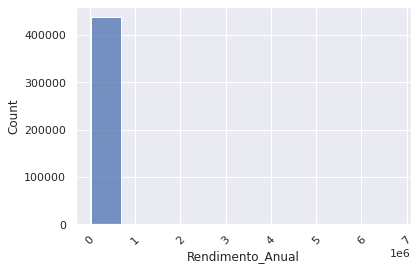

In [ ]:
sns.histplot(data=df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
coluna = df_clientes_cadastrados_ID_unicos['Rendimento_Anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items():
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [ ]:
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_ID_unicos.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [ ]:
df_clientes_cadastrados_sem_outliers[colunas_continuas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


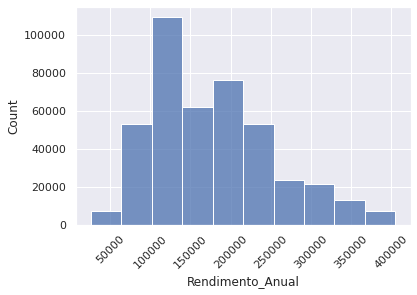

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

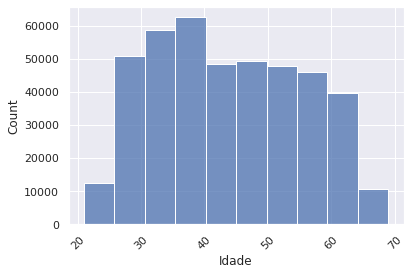

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

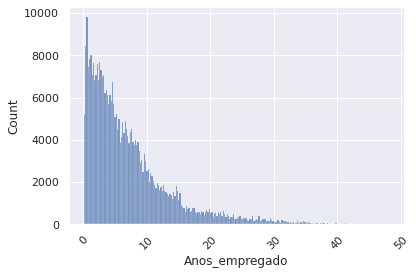

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_clientes_cadastrados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [ ]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria',
                       'Categoria_de_renda', 'Grau_Escolaridade',
                       'Estado_Civil', 'Moradia', 'Tem_Celular',
                       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                       'Ocupacao']

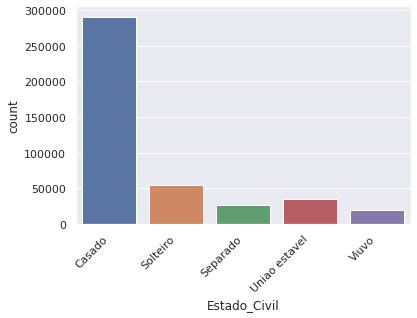

In [ ]:
sns.countplot(x = 'Estado_Civil', data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

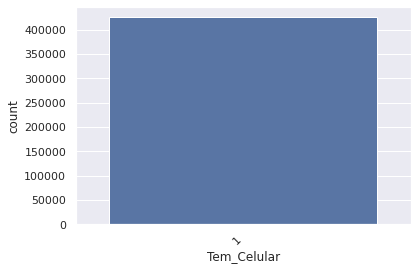

In [ ]:
sns.countplot(x = 'Tem_Celular', data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

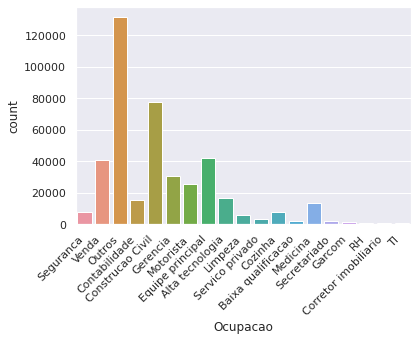

In [ ]:
sns.countplot(x = 'Ocupacao', data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

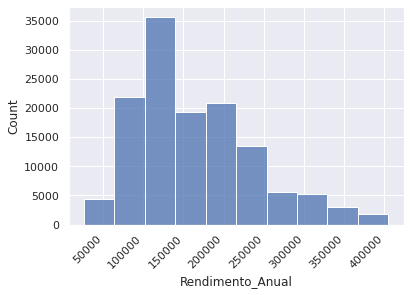

In [ ]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [ ]:
colunas_categoricas.remove('Genero')

In [ ]:
colunas_categoricas.remove('Tem_Celular')
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

#Aula 3

In [ ]:
df_clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [ ]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_clientes_aprovados.ID_Cliente.value_counts().shape

(45985,)

In [ ]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [ ]:
df_clientes_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [ ]:
df_clientes_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [ ]:
df_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

In [ ]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [ ]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [ ]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [ ]:
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [ ]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [ ]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [ ]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [ ]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [ ]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [ ]:
df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [ ]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [ ]:
import numpy as np

In [ ]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage      

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [ ]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


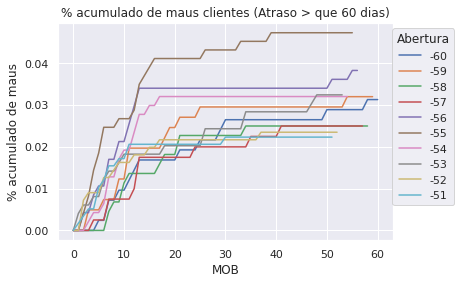

In [ ]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

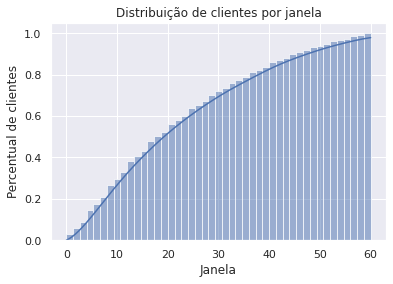

In [ ]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [ ]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [ ]:
for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [ ]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


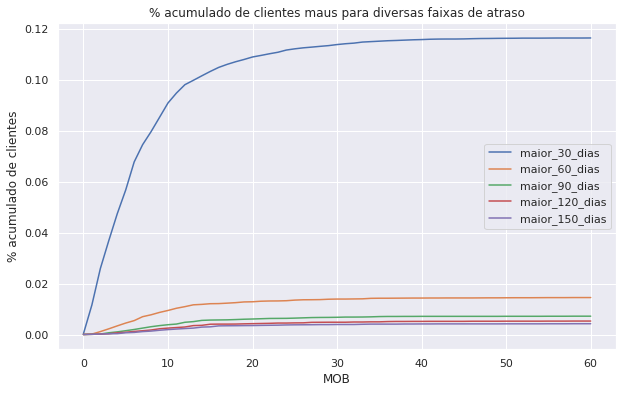

In [ ]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

#Aula 4

In [ ]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [ ]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [ ]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [ ]:
df_registros_creditos_id.shape

(30918, 2)

In [ ]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [ ]:
df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [ ]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

In [ ]:
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_binarias                              

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [ ]:
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']
colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [ ]:
df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_continuas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [ ]:
!pip install scikit-learn==0.23.2 imbalanced-learn==0.7.0

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats

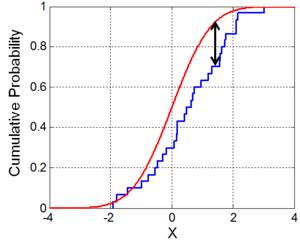

In [ ]:
SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

In [ ]:
from sklearn.pipeline import Pipeline

AUC 0.5
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


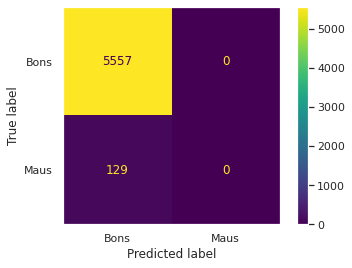


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.5847293657137516
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


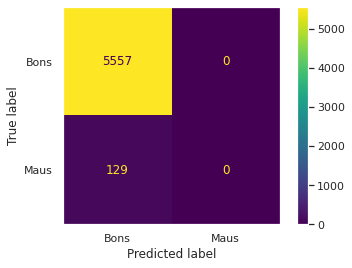


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

Oversampling e undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

AUC 0.5815864619385006
KS Ks_2sampResult(statistic=0.1290889905029898, pvalue=1.09559025330554e-41)


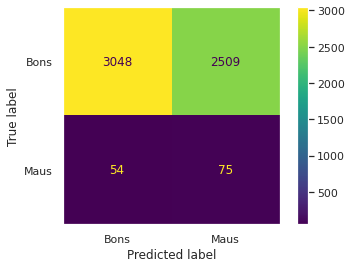


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

AUC 0.8340043216670643
KS Ks_2sampResult(statistic=0.9653534998241294, pvalue=0.0)


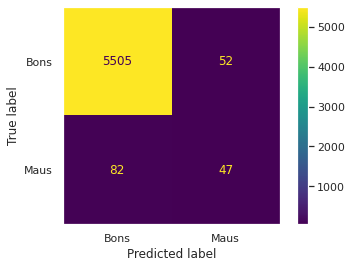


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.47      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.8382939040500634
KS Ks_2sampResult(statistic=0.9794231445655998, pvalue=0.0)


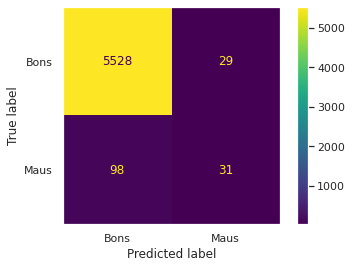


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

#Aula 5

In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])

In [ ]:
x = df_registro_clientes_targets.drop(['ID_Cliente', 'Mau'], axis=1)
y = df_registro_clientes_targets['Mau']

pipeline.fit(x, y)

Pipeline(steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Categoria_de_renda',
                                                    'Grau_Escolaridade',
                                                    'Estado_Civil', 'Moradia',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Tem_email', 'Ocupacao'],
                               colunas_continuas=['Idade', 'Qtd_Filhos',
                                                  'Rendimento_Anual',
                                                  'Anos_empregado',
                                                  'Tamanho_Familia'])),
                ('sampling', SMOTE(random_state=1561651)),
                ('Modelo', Random

In [ ]:
from joblib import dump

In [ ]:
dump(pipeline, 'modelo.joblib')

['modelo.joblib']

In [ ]:
features = x.columns
features

Index(['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado',
       'Tamanho_Familia', 'Tem_Carro', 'Tem_Casa_Propria',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
       'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia',
       'Ocupacao'],
      dtype='object')

In [ ]:
dump(features, 'features.joblib')

['features.joblib']

In [ ]:
lista_campos = df_registro_clientes_targets[colunas_categoricas_nao_binarias].apply(lambda x: x.unique(),axis=0)
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [ ]:
dump(lista_campos, 'lista_campos.joblib')

['lista_campos.joblib']

#Desafio

Desafios aula 1:

Desafio 1: Explorar IDs repetidos (Atualização de cadastro ? Erro ?)

Desafio 2: Explorar as colunas (features) identificar contínuas, categóricas e binárias

Desafios aula 2:

Desafio 1: Explorar outras maneiras de identificar e de tratar os outliers

Desafio 2: Criar uma função para gerar os nosso gráficos

Desafio 3: Continuar a análise exploratória dos dados

Desafios aula 3:

Desafio 1: Criar uma tabela com a quantidade clientes relativo a base por faixas atraso

Desafio 2: Conhecer técnicas para resolver target

Desafios aula 4:

Desafio 1: Explorar undersampling

Desafio 2: Buscarem outras técnicas como por exemplo: XGboost

Desafio 3: Utilizar otimização de hiperparâmetros e seleção features

##Desafios aula 1:

###Desafio 1: Explorar IDs repetidos (Atualização de cadastro ? Erro ?)

In [ ]:
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].sort_values(by='ID_Cliente')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5


In [ ]:
df_clientes_cadastrados.query('ID_Cliente == 7022197')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0


Analisando o caso do ID 7022197 notamos um perfil de cliente muito diferente para ser um caso de atualização de cadastro.

###Desafio 2: Explorar as colunas (features) identificar contínuas, categóricas e binárias.

**Variável qualitativas ou categóricas**

As variáveis categóricas representam uma classificação, apresentam um número finito de categorias ou grupos distintos. Podem ser nominais ou ordinais:
 
* **Nominais**  

  Quando as categorias não podem ser ordenadas. Exemplos: Gênero, raça etc.

* **Ordinais**

  Quando as categorias podem ser ordenadas. Exemplos: escolaridade, patentes militares etc.

**Variável quantitativas**

Podem ser discretas ou contínuas:
 
* **Variável discreta**:

  Variáveis que representam uma contagem, onde os valores possíveis formam um conjunto finito ou infinito enumerável. Uma variável discreta é sempre numérica. Exemplo: número de filhos, tamanho da família etc.

* **Variável contínua**

  Variáveis que representam uma mensuração. Variáveis contínuas assumem valores em uma escala contínua (números reais), ou seja, são variáveis numéricas que podem assumir um número infinito de valores dentro de um intervalo. Exemplo: altura, peso etc.

A forma como uma variável é coletada pode alterar a sua classificação natural. Por exemplo, a informação de idade é tecnicamente uma variável contínua, visto que se soubermos a data de nascimento de uma pessoa podemos obter sua idade exata (em anos, meses, dias etc.) que seria representada por um número fracionário (float).

Acontece que em boa parte dos cadastros não temos a informação de data de nascimento das pessoas e sim sua idade em anos completos. Neste caso temos uma variável discreta.

Outra forma bastante comum de se encontrar informações de idade é em faixas etárias. Nesta situação passamos a trabalhar com uma variável qualitativa ordinal.


In [ ]:
# colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [ ]:
# colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria',
#                        'Categoria_de_renda', 'Grau_Escolaridade',
#                        'Estado_Civil', 'Moradia', 'Tem_Celular',
#                        'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
#                        'Ocupacao']

In [ ]:
# colunas_categoricas_binarias = ['Tem_Carro',
#                                 'Tem_Casa_Propria',
#                                 'Tem_telefone_trabalho',
#                                 'Tem_telefone_fixo',
#                                 'Tem_email']

In [ ]:
# colunas_categoricas_nao_binarias = ['Categoria_de_renda',
#                                     'Grau_Escolaridade',
#                                     'Estado_Civil',
#                                     'Moradia',
#                                     'Ocupacao']

## Desafios aula 2:

###Desafio 1: Explorar outras maneiras de identificar e de tratar os outliers

Podemos usar o box plot para identificar outliers

In [ ]:
df_clientes_cadastrados_ID_unicos.shape

(438463, 18)

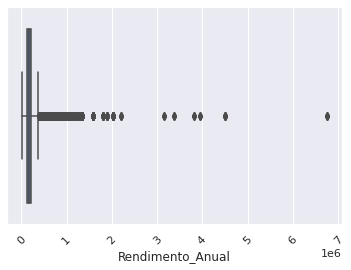

In [ ]:
sns.boxplot(data=df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual')
plt.xticks(rotation=45)
plt.show()

Podemos também utilizar alguns métodos estatísitcos que nos ajudem a identificar dados discrepantes em nossa distribuição. Um destes métodos é o z-score.

A aplicação de métodos como o z-score dependem da premissa de que a distibuição dos dados segue uma distribuição normal. O problema aqui é que nossa variável **Rendimento Anual**, como a maioria das variáveis desta natureza, apresenta forte assimetria a direta, como é possível notar no box plot acima.

Um teste visual e bem simples sobre a normalidade dos dados pode ser feito com o uso de um qqplot. Este gráfico mostra uma comparação entre os quantis da distribuição empírica (nossos dados) versus os quantis da distribuição teórica. Abaixo temos um exemplo de como este gráfico deve se comportar quando uma distribuição segue uma normal.

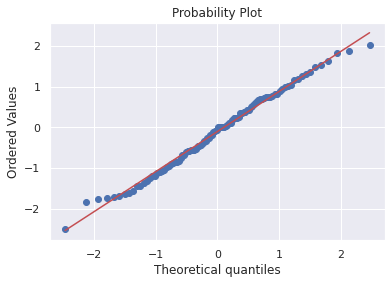

In [ ]:
from scipy import stats

np.random.seed(100)
normal = np.random.normal(0, 1, 100)

fig = plt.figure()
ax = fig.add_subplot()
stats.probplot(normal, dist='norm', plot=ax)
plt.show()

Quando aplicamos em nossos dados de **Rendimento Anual** observamos um comportamento bastante diferente do esperado.

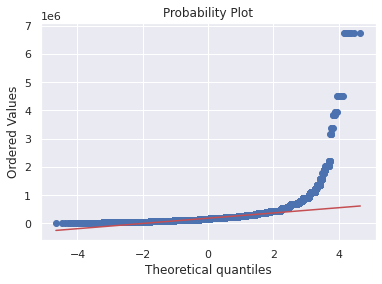

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
stats.probplot(df_clientes_cadastrados_ID_unicos['Rendimento_Anual'], dist='norm', plot=ax)
plt.show()

Dados como o nosso **Rendimento Anual** são bastante assimétricos a direita (muitos ganhando pouco e poucos ganhando muito). Nestes casos uma distribuição lognormal é frequentemente mais apropriada do que uma distribuição normal. Esta família de distribuições tem o nome lognormal porque, nos casos mais simples, os logaritmos das observações seguem uma distribuição normal.

Nestes casos uma simples transformação logarítmica torna a distribuição dos dados próxima de uma normal e nos permite aplicar as técnicas que dependem desta premissa.

Mais informações sobre como detectar e tratar outliers podem ser encontradas em:
> Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and Handle Outliers", The ASQC Basic References in Quality Control: Statistical Techniques, Edward F. Mykytka, Ph.D., Editor.

In [ ]:
df_clientes_cadastrados_ID_unicos['Log_Rendimento_Anual'] = np.log(df_clientes_cadastrados_ID_unicos['Rendimento_Anual'])

Obtendo o qqplot da variável transformada vemos um comportamento bem próximo do esperado.

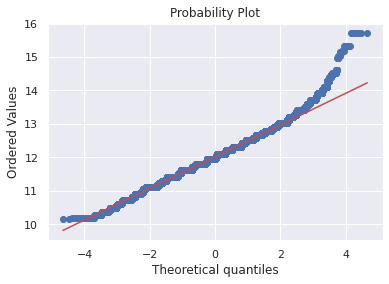

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
stats.probplot(df_clientes_cadastrados_ID_unicos['Log_Rendimento_Anual'], dist='norm', plot=ax)
plt.show()

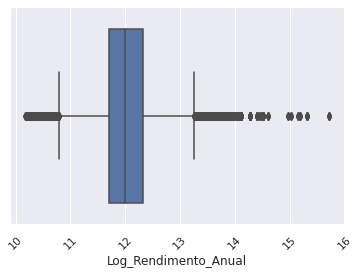

In [ ]:
sns.boxplot(data=df_clientes_cadastrados_ID_unicos, x='Log_Rendimento_Anual')
plt.xticks(rotation=45)
plt.show()

Calculamos o Z-Score

In [ ]:
z_scores = stats.zscore(df_clientes_cadastrados_ID_unicos['Log_Rendimento_Anual'])
z_scores

array([ 1.98263391,  1.98263391, -0.82833359, ..., -2.37377318,
       -1.76803212, -0.66628504])

Calculamos o valor absoluto de todos os z scores calculados

In [ ]:
z_scores_abs = np.abs(z_scores)
z_scores_abs

array([1.98263391, 1.98263391, 0.82833359, ..., 2.37377318, 1.76803212,
       0.66628504])

Filtramos os valores que tem z-score absoluto menor que 3, que não são outliers.

In [ ]:
filtro_outliers = z_scores_abs < 3
filtro_outliers

array([ True,  True,  True, ...,  True,  True,  True])

Aplicamos o filtro no nosso dataframe e ficamos com 436.456

In [ ]:
df_clientes_cadastrados_ID_unicos[filtro_outliers].shape

(436456, 19)

Na técnica aplicada no curso ficamos com 425.822

In [ ]:
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

E originalmente nós tinhamos 438.463

In [ ]:
df_clientes_cadastrados_ID_unicos.shape

(438463, 19)

Ainda temos alguns outliers podemos mudar o nosso valor de corte do z-score

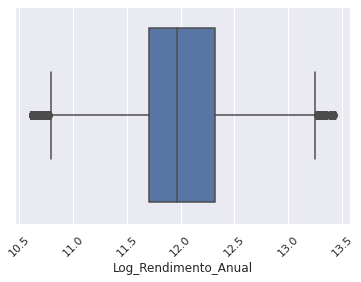

In [ ]:
sns.boxplot(data=df_clientes_cadastrados_ID_unicos[filtro_outliers], x='Log_Rendimento_Anual')
plt.xticks(rotation=45)
plt.show()

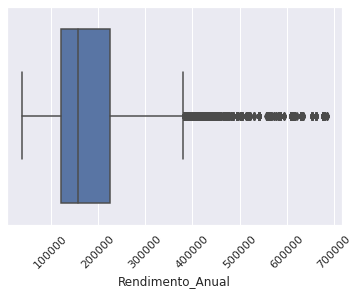

In [ ]:
sns.boxplot(data=df_clientes_cadastrados_ID_unicos[filtro_outliers], x='Rendimento_Anual')
plt.xticks(rotation=45)
plt.show()

Lembre-se sempre que na identificação e tratamento de outliers é sempre importante o cientista de dados avaliar caso a caso. Em algumas situações informações que parecem discrepantes são na verdade válidas e importantes de serem consideradas no processo de modelagem.

###Desafio 2: Criar uma função para gerar os nosso gráficos

Utilizando apenas um **for** conseguimos construir uma função de plot automático das features, mas há bastante espaço para melhor formatar os gráficos.

In [ ]:
def countplot_lista(lista_colunas):
  for coluna in lista_colunas:
    sns.countplot(x = coluna, data = df_clientes_cadastrados_sem_outliers)
    plt.xticks(rotation=45, ha='right')
    plt.show()

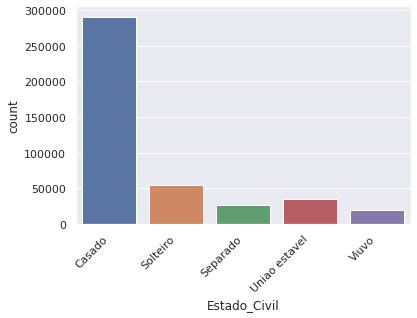

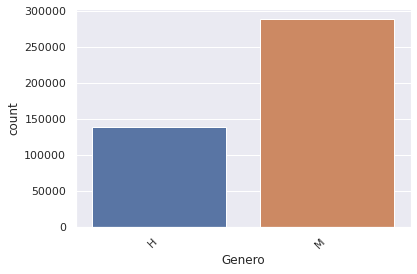

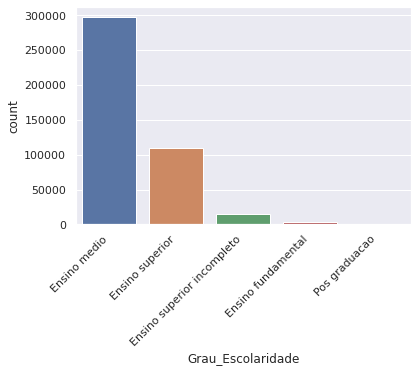

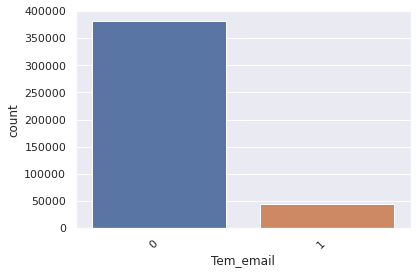

In [ ]:
lista_colunas = ['Estado_Civil', 'Genero', 'Grau_Escolaridade', 'Tem_email']
countplot_lista(lista_colunas)

###Desafio 3: Continuar a analise exploratória dos dados

Aplicar os conceitos aprendidos nos primeiros módulos para explorar todas as features e aprender mais sobre os nossos dados.

##Desafios aula 3:

###Desafio 1: Criar uma tabela com a quantidade clientes relativo a base por faixas de atraso

Primeiro vou incluir uma nova faixa de atraso no nosso dicionário **dict_intervalo_atraso**, ela vai ser necessária para classificarmos os atrasos de 1 a 29 dias, que têm o índice igual a 2.

In [ ]:
dict_intervalo_atraso['maior_1_dia'] = 2

Agora podemos criar uma nova coluna que vai guardar a classificação de Mau para dívidas com algum atraso, para isso vamos usar o apply que vai verificar se o ind_faixa_atraso é maior ou igual a 2 e classificar como 1.

In [ ]:
chave = 'maior_1_dia'
valor = 2
df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias,Mau_maior_1_dia
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0,1
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0,1
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0,1
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0,0


Agora vamos calcular a taxa de mau para todos os intervalos de atraso. (Numero da linha. Explicação).

1. Precisamos de um dicionário que vai armazenar os valores calculados.

2. Vamos calcular a quantidade de clientes na base, acessando a coluna **ID_Cliente**, depois utilizar o **set** para pegar os IDs sem repetição e por fim utilizamos o **len** para calcular a quantidade e salvamos na váriavel **id_sum**.

4. Agora vamos calcular a taxa de Mau por cada intervalor de atraso, para isso vamos iterar no dicionário **dict_intervalo_atraso.keys**.

5. Primeiro agrupamos os IDS, olhamos para as colunas dos Maus para um determinado intervalo, depois aplicamos o **agg** com o parâmetro **sum**, calculando assim a quantidade mau e vamos salvar essa series na variável **ser_qtd_vezes_mau**.

6. Agora podemos unir o nosso dataframe de registro de clientes com a nossa series quantidade de mau, vamos salvar essa união no dataframe **df_clientes_aprovados_merge**.

7. Utilizando o **loc** vamos pegar todos os clientes que foram pelo menos uma vez classificados com 1 na coluna Mau daquele intervalo e incluir o valor 1 nessa coluna.

8. Agora finalmente para calcular a taxa de mau, vamos usar o **sum** para somar todos os uns que tivermos no nosso dataframe **df_clientes_aprovados_merge** e dividir por **id_sum**.

9. Por fim vamos salvar esse valor no nosso dicionário e indicar através da chave qual intervalo corresponde a essa taxa de mau.

11. Depois que calcularmos para todos os intervalos vamos criar um dataframe com esse dicionário.

13. Ordenar pela texa de mau.

14. E finalmente exibir esse dataframe.



In [ ]:
dict_taxa_mau_merge = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  ser_qtd_vezes_mau = df_clientes_aprovados.groupby('ID_Cliente')[f'Mau_{chave}'].agg(sum)
  df_clientes_aprovados_merge = pd.merge(df_registros_creditos_ID, ser_qtd_vezes_mau, on='ID_Cliente', how='left')
  df_clientes_aprovados_merge.loc[df_clientes_aprovados_merge[f'Mau_{chave}'] > 1, f'Mau_{chave}'] = 1
  taxa_mau = df_clientes_aprovados_merge[f'Mau_{chave}'].sum() / id_sum
  dict_taxa_mau_merge[chave] = taxa_mau

df_taxa_mau_merge = pd.DataFrame({'Faixa_atrasos': list(dict_taxa_mau_merge.keys()),
                                  'Taxa_Maus': list(dict_taxa_mau_merge.values())})
df_taxa_mau_merge = df_taxa_mau_merge.sort_values('Taxa_Maus', ascending=False)
df_taxa_mau_merge

,Faixa_atrasos,Taxa_Maus
5,maior_1_dia,0.870545
0,maior_30_dias,0.116342
1,maior_60_dias,0.014505
2,maior_90_dias,0.007198
3,maior_120_dias,0.005284
4,maior_150_dias,0.004241


### Desafio 2: Conhecer técnicas para resolver target ( Dados desbalanceados )



**Dados Desbalanceados**

Problemas que envolvem classificação são bastante comuns em machine learning. Modelos que envolvem dados do mercado financeiro, detecção de fraudes em cartões de crédito e diagnóstico de doenças são bons exemplos destes problemas.

Quando exploramos datasets como os que identificam fraudes em cartões de crédito, percebemos um forte desbalanceamento entre as classes existentes (fraude e não-fraude), ou seja, temos mais registros de operações que não envolvem fraude (classe majoritária) do que operações que envolvem fraude (classe minoritária).

A presença desta característica nos dados pode acarretar em problemas na construção de modelos e na geração de previsões. Em boa parte dos casos, quando geramos modelos sem levar em consideração esse desbalanceamento, corremos o risco de cair no paradoxo da acurácia, que pode ser definido como a situação contraditória na qual uma acurácia elevada em seu modelo de classificação pode evidenciar uma falha do seu próprio modelo em realizar predições de fato significativas.

Quando nos deparamos com datasets desbalanceados, podemos utilizar duas técnicas para solucionar este problema:

**Undersampling**

Método que consiste em reduzir o total de registros da classe majoritária, com o objetivo de igualar a proporção das categorias. Pode ser realizado de forma aleatória com a retirada de dados da classe majoritária (perda de informação) ou utilizando métodos mais sofisticados que produzem a união de uma ou mais observações da classe majoritária. Neste último a perda de informação ainda existe, mas com um impacto menor.

**Oversampling**

Método que cria sinteticamente novos registros da classe minoritária, com o objetivo de igualar a proporção das categorias. Assim como na técnica de undersampling, pode ser realizado de forma aleatória copiando dados da classe minoritária ou por meio de métodos mais elaborados e com melhor performance como a técnica SMOTE (Synthetic Minority Oversampling TEchnique) que pode ser melhor entendida no seguinte [Para saber mais](https://bootcamps.alura.com.br/course/bootcamp-datascience-2-modulo-6/task/74465).

Outras técnicas e como utilizá-las com Python podem ser consultadas na documentação da biblioteca [imbalanced-learn](https://imbalanced-learn.org/stable/).

##Desafios aula 4:



###Desafio 1: Explorar undersampling



In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

AUC 0.5867102460337057
KS Ks_2sampResult(statistic=0.10851213506858952, pvalue=1.477032211058085e-29)


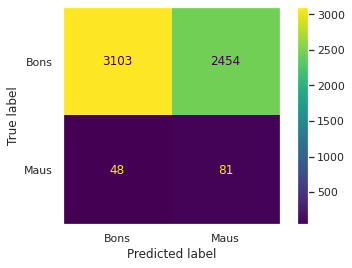


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      5557
           1       0.03      0.63      0.06       129

    accuracy                           0.56      5686
   macro avg       0.51      0.59      0.39      5686
weighted avg       0.96      0.56      0.70      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', RandomUnderSampler(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

###Desafio 2: Buscarem outras técnicas como por exemplo: XGboost



In [ ]:
from xgboost import XGBClassifier

AUC 0.6634003066179538
KS Ks_2sampResult(statistic=0.9996482588814632, pvalue=0.0)


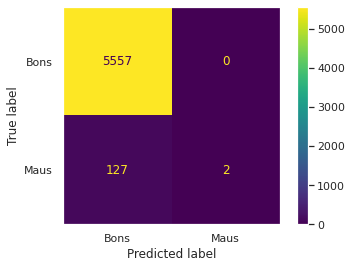


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       1.00      0.02      0.03       129

    accuracy                           0.98      5686
   macro avg       0.99      0.51      0.51      5686
weighted avg       0.98      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', XGBClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

[Documentação](https://xgboost.readthedocs.io/en/latest/)

XGBoost combina árvore de decisão (Decision Trees) com aumento de gradiente (Gradient Boosting) e a ideia é treinar diversos modelos e utilizar o GB para diminuir a perda com o modelo seguinte.

###Desafio 3: Utilizar otimização de hiperparâmetros e seleção features

Para a seleção de features podemos usar uma seleção manual, estudando cada uma das nossas features, analisando a correlação entre elas, como fizemos no modulo 5 por exemplo.

E também podemos usar soluções automatizadas como por exemplo [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

O mesmo vale para otimização de hiperparâmetros, onde podemos explorar como fizemos no modulo 5 utilizando um **for** e analisando cada resultado para escolher os melhores parâmetros para o nosso problema e dados.

Ou podemos partir para outras soluções como o RandomizedSearchCV e GridSearchCV detalhados neste [artigo](https://www.alura.com.br/artigos/otimizacao-de-parametros), onde vamos explorar de maneira mais automática as possibilidades de parâmetros dos nossos modelos.

## Desafios aula 5

### Desafio 1:  Terminar o formulário e o tratamento das variáveis

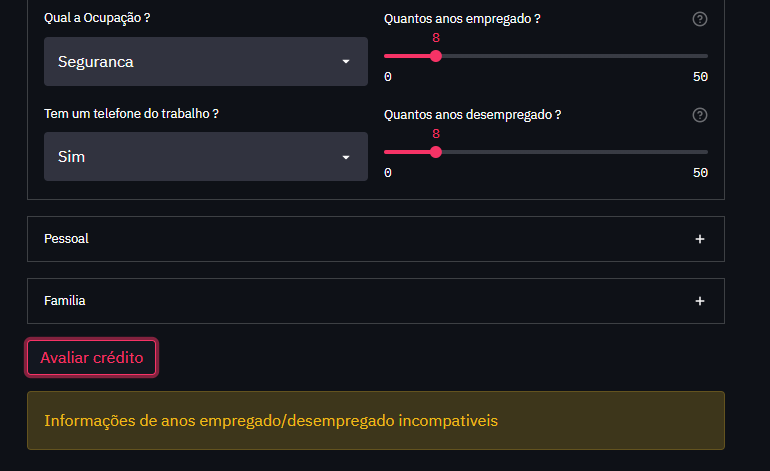

Função que valida os dados de anos empregado

In [ ]:
def validar_dados(dict_respostas):
	# Validando os dados de anos empregado, já que a pessoa não poder estar emprega e desemprega ao mesmo tempo. #ClienteDeSchrödinger
	if dict_respostas['Anos_empregado'] != 0 and dict_respostas['Anos_desempregado'] != 0:
		st.warning('Informações de anos empregado/desempregado incompativeis')
		return False
	return True

Atualização do botão de Avaliar crédito para só executar caso a função valida_dados retorne verdadeiro.

In [ ]:
if st.button('Avaliar crédito') and validar_dados(dict_respostas):
	if avaliar_mau(dict_respostas):
		st.error('Crédito negado')
	else:
		st.success('Crédito aprovado')